# 📦 Supply Chain Data Exploration & Profiling

**Author:** John-Paul McGrath  
**Date:** November 2025  
**Dataset:** DataCo Smart Supply Chain (180k+ orders)

---

## 🎯 Objective

This notebook performs comprehensive exploratory data analysis (EDA) on the DataCo Supply Chain dataset to:

1. **Understand** the data structure and quality
2. **Identify** patterns in late deliveries
3. **Discover** relationships between variables
4. **Prepare** insights for predictive modeling

---

## 📑 Table of Contents

1. [Setup & Imports](#1-setup)
2. [Data Loading](#2-loading)
3. [First Look](#3-first-look)
4. [Data Quality Assessment](#4-quality)
5. [Univariate Analysis](#5-univariate)
6. [Target Variable Deep Dive](#6-target)
7. [Bivariate Analysis](#7-bivariate)
8. [Key Findings & Next Steps](#8-findings)

---

<a id="1-setup"></a>
## 1️⃣ Setup & Imports

Loading required libraries and configuring visualization settings.

In [1]:
# =============================================================================
# IMPORTS & CONFIGURATION
# =============================================================================

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Plot styling - professional dark theme
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Figure defaults
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries loaded successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")

Matplotlib is building the font cache; this may take a moment.


✅ Libraries loaded successfully!
📊 Pandas version: 2.3.3
🔢 NumPy version: 2.2.6


<a id="2-loading"></a>
## 2️⃣ Data Loading

Loading the DataCo Supply Chain dataset from our local data directory.

In [2]:
# =============================================================================
# LOAD DATASET
# =============================================================================

# Load main dataset (using latin-1 encoding for special characters)
df = pd.read_csv('../data/DataCoSupplyChainDataset.csv', encoding='latin-1')

# Quick confirmation
print(f"✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"💾 Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

✅ Dataset loaded successfully!
📊 Shape: 180,519 rows × 53 columns
💾 Memory usage: 332.6 MB


<a id="3-first-look"></a>
## 3️⃣ First Look at the Data

Understanding the structure, columns, and sample records.

In [3]:
# =============================================================================
# COLUMN OVERVIEW
# =============================================================================

# Create a comprehensive column summary
col_info = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.notnull().sum().values,
    'Null Count': df.isnull().sum().values,
    'Null %': (df.isnull().sum().values / len(df) * 100).round(2),
    'Unique Values': df.nunique().values,
    'Sample Value': [df[col].iloc[0] for col in df.columns]
})

print(f"📋 Dataset has {len(df.columns)} columns:\n")
col_info

📋 Dataset has 53 columns:



,Column,Data Type,Non-Null Count,Null Count,Null %,Unique Values,Sample Value
0,Type,object,180519,0,0.00,4,DEBIT
1,Days for shipping (real),int64,180519,0,0.00,7,3
2,Days for shipment (scheduled),int64,180519,0,0.00,4,4
3,Benefit per order,float64,180519,0,0.00,21998,91.25
4,Sales per customer,float64,180519,0,0.00,2927,314.64
5,Delivery Status,object,180519,0,0.00,4,Advance shipping
6,Late_delivery_risk,int64,180519,0,0.00,2,0
7,Category Id,int64,180519,0,0.00,51,73
8,Category Name,object,180519,0,0.00,50,Sporting Goods
9,Customer City,object,180519,0,0.00,563,Caguas


In [4]:
# =============================================================================
# SAMPLE RECORDS
# =============================================================================

print("🔍 First 5 rows of the dataset:\n")
df.head()

🔍 First 5 rows of the dataset:



,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.25,314.64,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.00,2,Fitness,18.25,-66.04,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.11,0.04,180517,327.75,0.29,1,327.75,314.64,91.25,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.09,311.36,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.00,2,Fitness,18.28,-66.04,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.39,0.05,179254,327.75,-0.80,1,327.75,311.36,-249.09,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.78,309.72,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.00,2,Fitness,37.29,-121.88,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.03,0.06,179253,327.75,-0.80,1,327.75,309.72,-247.78,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.86,304.81,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.00,2,Fitness,34.13,-118.29,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.94,0.07,179252,327.75,0.08,1,327.75,304.81,22.86,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.21,298.25,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.00,2,Fitness,18.25,-66.04,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.50,0.09,179251,327.75,0.45,1,327.75,298.25,134.21,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


<a id="4-quality"></a>
## 4️⃣ Data Quality Assessment

Checking for missing values, duplicates, and data integrity issues.

⚠️ Found 4 columns with missing values:



,Missing Count,Missing %
Product Description,"180,519",100.0%
Order Zipcode,"155,679",86.2%
Customer Lname,8,0.0%
Customer Zipcode,3,0.0%


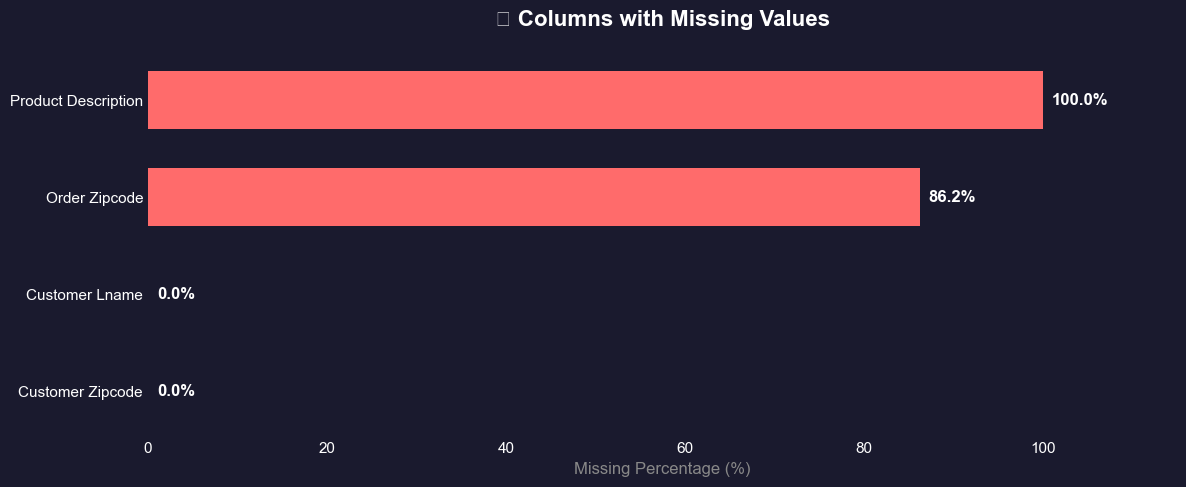

In [23]:
# =============================================================================
# MISSING VALUES ANALYSIS
# =============================================================================

# Calculate missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).query('`Missing Count` > 0').sort_values('Missing %', ascending=False)

if len(missing_df) > 0:
    print(f"⚠️ Found {len(missing_df)} columns with missing values:\n")
    
    # Styled table
    styled_missing = (missing_df.style
        .format({'Missing Count': '{:,.0f}', 'Missing %': '{:.1f}%'})
        .background_gradient(subset=['Missing %'], cmap='Reds')
        .set_properties(**{'text-align': 'center'})
    )
    display(styled_missing)
    
    # Dark themed visualization
    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(12, 5))
    fig.patch.set_facecolor('#1a1a2e')
    ax.set_facecolor('#1a1a2e')
    
    # Gradient colors based on severity
    colors = ['#ff6b6b' if pct > 50 else '#ffa502' if pct > 10 else '#7bed9f' 
              for pct in missing_df['Missing %']]
    
    bars = ax.barh(missing_df.index, missing_df['Missing %'], color=colors, 
                   height=0.6, edgecolor='none')
    
    # Add percentage labels
    for bar, pct in zip(bars, missing_df['Missing %']):
        ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
                f'{pct:.1f}%', va='center', ha='left', fontsize=12,
                fontweight='bold', color='white')
    
    ax.set_xlabel('Missing Percentage (%)', fontsize=12, color='#888888')
    ax.set_title('🔍 Columns with Missing Values', fontsize=16, 
                 fontweight='bold', color='white', pad=20)
    ax.set_xlim(0, 115)
    ax.tick_params(colors='white', labelsize=11)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color('#888888')
    ax.spines['left'].set_color('#888888')
    ax.invert_yaxis()
    ax.grid(False)
    
    plt.tight_layout()
    plt.show()
    
    # Reset style
    plt.style.use('seaborn-v0_8-darkgrid')
    
else:
    print("✅ No missing values found in the dataset!")

In [7]:
# =============================================================================
# DUPLICATE ANALYSIS
# =============================================================================

# Check for duplicate rows
duplicates = df.duplicated().sum()
duplicate_pct = (duplicates / len(df) * 100).round(2)

print(f"🔄 Duplicate Analysis:")
print(f"   • Total rows: {len(df):,}")
print(f"   • Duplicate rows: {duplicates:,} ({duplicate_pct}%)")
print(f"   • Unique rows: {len(df) - duplicates:,}")

if duplicates > 0:
    print(f"\n⚠️ Consider removing {duplicates:,} duplicate rows during ETL")
else:
    print(f"\n✅ No duplicate rows found!")

🔄 Duplicate Analysis:
   • Total rows: 180,519
   • Duplicate rows: 0 (0.0%)
   • Unique rows: 180,519

✅ No duplicate rows found!


In [8]:
# =============================================================================
# DATA TYPES SUMMARY
# =============================================================================

# Group columns by data type
dtype_summary = df.dtypes.value_counts()

print("📊 Column Data Types:\n")
for dtype, count in dtype_summary.items():
    cols = df.select_dtypes(include=[dtype]).columns.tolist()
    print(f"  {dtype}: {count} columns")
    if count <= 10:
        for col in cols:
            print(f"      • {col}")
    else:
        print(f"      • {cols[0]}, {cols[1]}, ... and {count-2} more")
    print()

📊 Column Data Types:

  object: 24 columns
      • Type, Delivery Status, ... and 22 more

  float64: 15 columns
      • Benefit per order, Sales per customer, ... and 13 more

  int64: 14 columns
      • Days for shipping (real), Days for shipment (scheduled), ... and 12 more



<a id="5-univariate"></a>
## 5️⃣ Univariate Analysis

Exploring individual variables - distributions, frequencies, and statistics.

In [9]:
# =============================================================================
# NUMERICAL VARIABLES - DESCRIPTIVE STATISTICS
# =============================================================================

print("📈 Numerical Variables - Statistical Summary:\n")

# Select key numerical columns
num_cols = ['Days for shipping (real)', 'Days for shipment (scheduled)', 
            'Benefit per order', 'Sales per customer', 'Order Item Quantity',
            'Order Item Discount', 'Order Item Profit Ratio', 'Sales']

# Filter to columns that exist
num_cols = [col for col in num_cols if col in df.columns]

df[num_cols].describe().round(2)

📈 Numerical Variables - Statistical Summary:



,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Order Item Quantity,Order Item Discount,Order Item Profit Ratio,Sales
count,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00,180519.00
mean,3.50,2.93,21.97,183.11,2.13,20.66,0.12,203.77
std,1.62,1.37,104.43,120.04,1.45,21.80,0.47,132.27
min,0.00,0.00,-4274.98,7.49,1.00,0.00,-2.75,9.99
25%,2.00,2.00,7.00,104.38,1.00,5.40,0.08,119.98
50%,3.00,4.00,31.52,163.99,1.00,14.00,0.27,199.92
75%,5.00,4.00,64.80,247.40,3.00,29.99,0.36,299.95
max,6.00,4.00,911.80,1939.99,5.00,500.00,0.50,1999.99


In [10]:
# =============================================================================
# TARGET VARIABLE: Late_delivery_risk
# =============================================================================

# Value counts - how many of each class?
target_counts = df['Late_delivery_risk'].value_counts()

# Percentages - what proportion?
target_pct = df['Late_delivery_risk'].value_counts(normalize=True) * 100

print("🎯 Target Variable Analysis: Late_delivery_risk\n")
print("Value counts:")
print(f"   0 (On-time):  {target_counts[0]:,} orders ({target_pct[0]:.1f}%)")
print(f"   1 (Late):     {target_counts[1]:,} orders ({target_pct[1]:.1f}%)")
print(f"\n📊 Class balance: {'Balanced ✅' if 40 < target_pct[1] < 60 else 'Imbalanced ⚠️'}")

🎯 Target Variable Analysis: Late_delivery_risk

Value counts:
   0 (On-time):  81,542 orders (45.2%)
   1 (Late):     98,977 orders (54.8%)

📊 Class balance: Balanced ✅


<a id="6-target"></a>
## 6️⃣ Target Variable Deep Dive

Analyzing `Late_delivery_risk`, the variable we'll predict with machine learning.

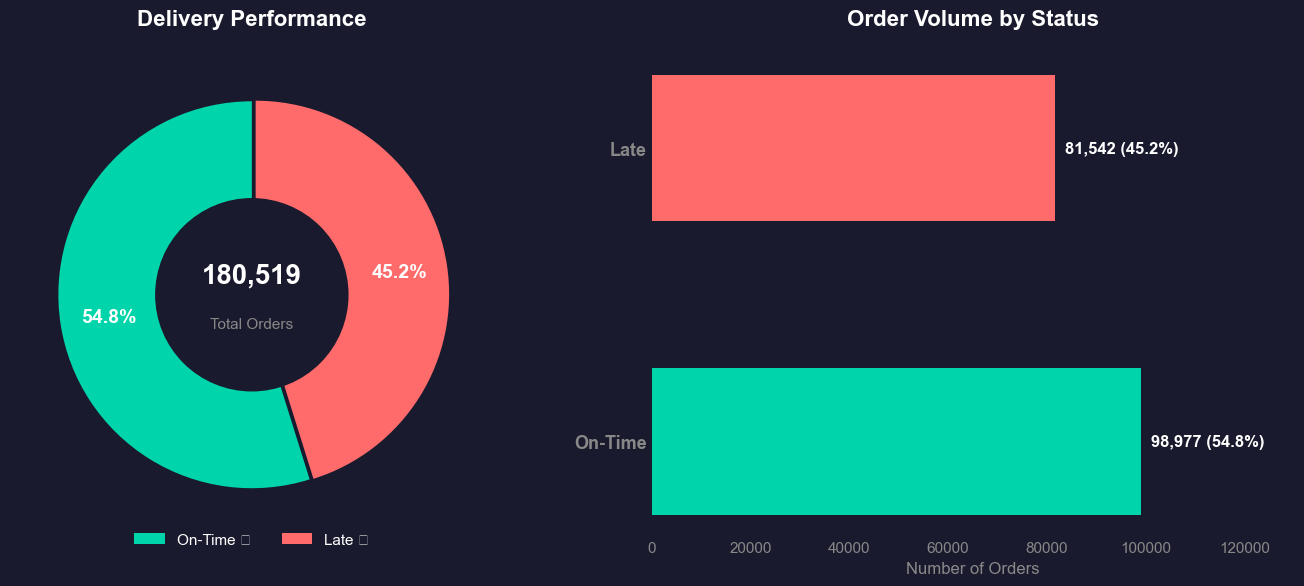

In [16]:
# =============================================================================
# VISUALIZE TARGET VARIABLE - STYLED
# =============================================================================

# Custom style - dark theme, more professional
plt.style.use('dark_background')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.patch.set_facecolor('#1a1a2e')

# Custom colors - more sophisticated palette
colors = ['#00d4aa', '#ff6b6b']  # Teal for on-time, coral for late

# --- Left: Donut Chart (more modern than pie) ---
wedges, texts, autotexts = axes[0].pie(
    target_counts, 
    labels=None,  # We'll add custom labels
    autopct='%1.1f%%', 
    colors=colors,
    startangle=90,
    pctdistance=0.75,
    explode=(0, 0.02),
    shadow=False,
    textprops={'fontsize': 14, 'fontweight': 'bold', 'color': 'white'}
)

# Add center circle for donut effect
centre_circle = plt.Circle((0, 0), 0.50, fc='#1a1a2e')
axes[0].add_patch(centre_circle)

# Center text
axes[0].text(0, 0.1, '180,519', fontsize=20, fontweight='bold', 
             ha='center', va='center', color='white')
axes[0].text(0, -0.15, 'Total Orders', fontsize=11, 
             ha='center', va='center', color='#888888')

# Custom legend
axes[0].legend(wedges, ['On-Time ✓', 'Late ✗'], loc='lower center', 
               fontsize=11, frameon=False, ncol=2,
               bbox_to_anchor=(0.5, -0.05))

axes[0].set_title('Delivery Performance', fontsize=16, fontweight='bold', 
                  color='white', pad=20)
axes[0].set_facecolor('#1a1a2e')

# --- Right: Horizontal Bar (cleaner than vertical) ---
axes[1].set_facecolor('#1a1a2e')

y_pos = [0, 1]
bars = axes[1].barh(y_pos, target_counts.values, color=colors, height=0.5, 
                     edgecolor='none')

# Labels on bars
for i, (bar, count, pct) in enumerate(zip(bars, target_counts.values, target_pct.values)):
    axes[1].text(count + 2000, bar.get_y() + bar.get_height()/2, 
                 f'{count:,} ({pct:.1f}%)', va='center', fontsize=12, 
                 fontweight='bold', color='white')

axes[1].set_yticks(y_pos)
axes[1].set_yticklabels(['On-Time', 'Late'], fontsize=13, fontweight='bold')
axes[1].set_xlabel('Number of Orders', fontsize=12, color='#888888')
axes[1].set_title('Order Volume by Status', fontsize=16, fontweight='bold', 
                  color='white', pad=20)
axes[1].set_xlim(0, 130000)
axes[1].tick_params(colors='#888888')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['bottom'].set_color('#888888')
axes[1].spines['left'].set_color('#888888')
axes[1].grid(False)

plt.tight_layout()
plt.show()

# Reset style for future plots
plt.style.use('seaborn-v0_8-darkgrid')

<a id="7-bivariate"></a>
## 7️⃣ Bivariate Analysis

Exploring relationships between variables — what factors correlate with late deliveries?

### 7.1 Shipping Mode vs Late Delivery

In [18]:
# =============================================================================
# SHIPPING MODE ANALYSIS
# =============================================================================

# Group by shipping mode and calculate late delivery stats
shipping_analysis = df.groupby('Shipping Mode').agg(
    total_orders=('Late_delivery_risk', 'count'),
    late_orders=('Late_delivery_risk', 'sum'),
).reset_index()

# Calculate late percentage
shipping_analysis['late_pct'] = (shipping_analysis['late_orders'] / 
                                  shipping_analysis['total_orders'] * 100).round(1)

# Sort by late percentage descending
shipping_analysis = shipping_analysis.sort_values('late_pct', ascending=False)

# Style the table
styled_table = (shipping_analysis.style
    .format({
        'total_orders': '{:,.0f}',
        'late_orders': '{:,.0f}', 
        'late_pct': '{:.1f}%'
    })
    .background_gradient(subset=['late_pct'], cmap='RdYlGn_r')
    .set_properties(**{'text-align': 'center'})
    .set_caption('📦 Late Delivery Rate by Shipping Mode')
)

styled_table

,Shipping Mode,total_orders,late_orders,late_pct
0,First Class,"27,814","26,513",95.3%
2,Second Class,"35,216","26,987",76.6%
1,Same Day,"9,737","4,454",45.7%
3,Standard Class,"107,752","41,023",38.1%


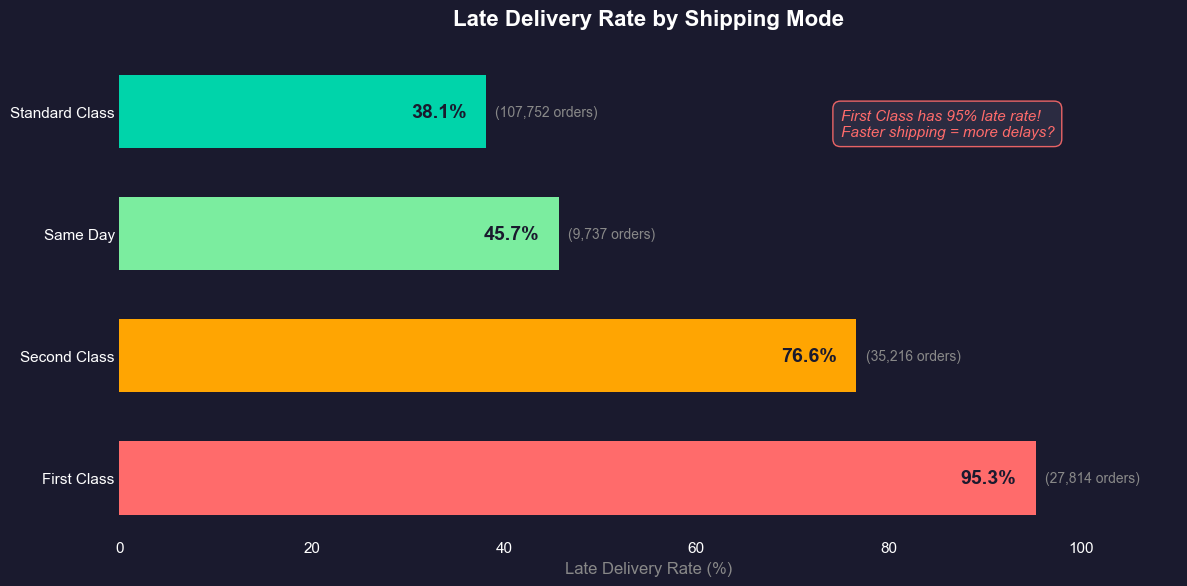


💡 KEY INSIGHT: Counter-intuitively, 'faster' shipping modes have HIGHER
   late delivery rates. First Class (95.3%) vs Standard (38.1%).
   This suggests overpromising on delivery times, not logistics issues.


In [22]:
# =============================================================================
# SHIPPING MODE VS LATE DELIVERY - VISUALIZATION
# =============================================================================

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#1a1a2e')
ax.set_facecolor('#1a1a2e')

# Colors - gradient from green (good) to red (bad)
colors = ['#ff6b6b', '#ffa502', '#7bed9f', '#00d4aa']

# Horizontal bar chart
bars = ax.barh(shipping_analysis['Shipping Mode'], 
               shipping_analysis['late_pct'], 
               color=colors, height=0.6, edgecolor='none')

# Add percentage labels inside bars
for bar, pct, orders in zip(bars, shipping_analysis['late_pct'], shipping_analysis['total_orders']):
    # Percentage label
    ax.text(bar.get_width() - 2, bar.get_y() + bar.get_height()/2, 
            f'{pct}%', va='center', ha='right', fontsize=14, 
            fontweight='bold', color='#1a1a2e')
    # Order count label (outside bar)
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
            f'({orders:,.0f} orders)', va='center', ha='left', fontsize=10,
            color='#888888')

# Styling
ax.set_xlabel('Late Delivery Rate (%)', fontsize=12, color='#888888')
ax.set_title('Late Delivery Rate by Shipping Mode', fontsize=16, 
             fontweight='bold', color='white', pad=20)
ax.set_xlim(0, 110)
ax.tick_params(colors='white', labelsize=11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#888888')
ax.spines['left'].set_color('#888888')
ax.grid(False)

# Add insight box
ax.text(75, 2.8, 'First Class has 95% late rate!\nFaster shipping = more delays?',
        fontsize=11, color='#ff6b6b', style='italic',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#2d2d44', edgecolor='#ff6b6b', alpha=0.9))

plt.tight_layout()
plt.show()

# Reset style
plt.style.use('seaborn-v0_8-darkgrid')

print("\n💡 KEY INSIGHT: Counter-intuitively, 'faster' shipping modes have HIGHER")
print("   late delivery rates. First Class (95.3%) vs Standard (38.1%).")
print("   This suggests overpromising on delivery times, not logistics issues.")

<a id="8-findings"></a>
## 8️⃣ Key Findings & Next Steps

### 📊 Data Overview
- **180,519 orders** across 53 features
- **4 columns** with missing values (Product Description 100%, Order Zipcode 86%)
- **No duplicate rows** — clean transaction data

### 🎯 Target Variable
- **Late Delivery Risk:** 54.8% late vs 45.2% on-time
- **Balanced classes** — no need for SMOTE or class weighting in ML

### 🚚 Key Insight: Shipping Mode Paradox
| Shipping Mode | Late Rate | Insight |
|---------------|-----------|---------|
| First Class | 95.3% | ⚠️ Worst performer |
| Second Class | 76.6% | Poor |
| Same Day | 45.7% | Average |
| Standard Class | 38.1% | ✅ Best performer |

**Counter-intuitive finding:** "Faster" shipping modes have HIGHER late rates. This suggests overpromising on delivery times rather than logistics failures.

### 🔜 Next Steps
1. **Database Design** — Create star schema in PostgreSQL
2. **ETL Pipeline** — Python script to load and transform data
3. **Feature Engineering** — Create predictive features
4. **ML Model** — Build late delivery classifier
5. **Tableau Dashboard** — Visualize insights interactively

---
*Notebook completed: November 2025*